## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

> Has the network latency gone up since we switched internet service providers?

   - Run speedtest on ookla
   - $H_0$ : our internet speeds have not changed since we changed internet providers.
   - $H_a$ : our internet speeds have increased since we changed internet providers.
    
- True-positive: Reject $H_0$
    - Speed after changing internet providers is faster
- False-positive: Reject $H_0$
    - internet speed after changing providers is faster, but I'm checking the speed at 10a.m on a Tuesday while nobody elseis home in the neighborhood
- False-negative: Fail to reject $H_0$
 - Internet speeds are slower since changing internet providers, but I'm checking the speeds while everyone is quarantined for coronavirus and everyone is using similar internet providers.
- True-negative: Fail to reject $H_0$
    - since changing internet providers speeds are indeed slower.

> Is the website redesign any good?

- survey our users, using a broad spectrum of demographics of new and existing users.
- $H_0$: our website makes for a harder to navigate and confusing ux
- $H_a$: Our website redesign makes for a better user experience
    
    - True-positive: reject $H_0$
        - We surveyed a broad spectrum of users and our website re-design indeed made our website easier to navigate.
    - False-positive: reject $H_0$
        - We surveyed our designers of the ux and they told us that our ux is better
    - False-negative: Fail to reject $H_0$
        - We surveyed people in the 50+ age bracket and they had never been on a website before.
    - True-negative: fail to reject $H_0$
        - we surveyed a broad spectrum of users and found that our website re-design made it more complicated for new and exisiting users to navigate


> Is our television ad driving more sales?

- Getting the sales from the accounting department of the company
- $H_0$: our television ad was unsuccessful and did not impact sales
- $H_a$: our television ad was successful and made for a very successful quarter

    - True-positive: Reject $H_0$
        - since we aired the ad sales have increased 35% for the product advertised
    - False-positive: Reject $H_0$
        - since we aired the ad sales increased 15% for the product advertised but it's christmas.
    - False-negative: fail to reject $H_0$
        - since we aired our ad sales decreased 10% for the product advertised but we got our numbers from a disgruntled accountant who wants to sabotage our data.
    - True-negative: Fail to reject $H_0$
        - since we aired our ad sales decreased 72% for the product advertised because our ad was a crappy ad and nobody wanted to buy our product.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
from scipy import stats
from math import sqrt

# office 1 sample of 40 sales days = mean = 90 STD: 15
# office 2 sample of 50 sales days = mean = 100 STD 20

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))

In [3]:
t

-2.6252287036468456

In [4]:
p = stats.t(degf).cdf(t) * 2
p 

0.01020985244923939

In [5]:
alpha = .05

p, alpha

(0.01020985244923939, 0.05)

- Load the mpg dataset and use it to answer the following questions:

In [6]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [7]:
mpg['fuel_efficency'] = (mpg.hwy + mpg.cty) / 2

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [8]:
x1 = mpg[mpg.year == 1999].fuel_efficency
x2 = mpg[mpg.year == 2008].fuel_efficency

t, p = stats.ttest_ind(x1, x2)

In [9]:
t, p

(0.21960177245940962, 0.8263744040323578)

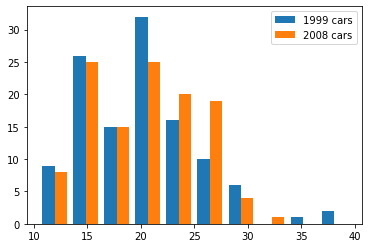

In [10]:
import matplotlib.pyplot as plt
plt.hist([x1, x2], 
label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

Are compact cars more fuel-efficient than the average car?

In [11]:
compact = mpg[mpg['class'] == 'compact']
not_compact = mpg[mpg['class'] != 'compact']

x1 = compact.fuel_efficency
x2 = not_compact.fuel_efficency

t, p = stats.ttest_ind(x1, x2)

In [12]:
t, p

(6.731177612837954, 1.3059121585018135e-10)

In [13]:
alpha = 0.05
print(f'with a alpha of {alpha} and a p-value of {p:.11f}, we can reject the null hypothesis')

with a alpha of 0.05 and a p-value of 0.00000000013, we can reject the null hypothesis


Do manual cars get better gas mileage than automatic cars?

In [14]:
manual = mpg[mpg['trans'].str.contains('manual')]
auto = mpg[mpg['trans'].str.contains('auto')]

x1 = manual.fuel_efficency
x2 = auto.fuel_efficency

t, p = stats.ttest_ind(x1, x2)

In [15]:
t, p

(4.593437735750014, 7.154374401145683e-06)

In [16]:
alpha = .05
print(f'with an alpha of {alpha} and a p-value of {p:.6f}, we can reject the null hypothesis')

with an alpha of 0.05 and a p-value of 0.000007, we can reject the null hypothesis


## correlation

### 1.) Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

- $H_0%: the shorter timeframe a customer has been with our internet/phone service provider the less they will pay per month.

- $H_a$: a customer would have paid more per month the longer they've used our internet/phone company

In [17]:
from env import user, password, host
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
query = " SELECT tenure, monthly_charges FROM customers; "
    
telco_churn = pd.read_sql(query, url)

x = telco_churn.tenure
y = telco_churn.monthly_charges

In [18]:
#monthly charges
r, p = stats.pearsonr(x, y)

print('our r=', r,"suggests that there is no correlation between tenure and paying less per month and",
 "our p value p=", p, f"being less than our alpha {0.5} rejects our null hypothesis")

our r= 0.24789985628615008 suggests that there is no correlation between tenure and paying less per month and our p value p= 4.0940449915016345e-99 being less than our alpha 0.5 rejects our null hypothesis


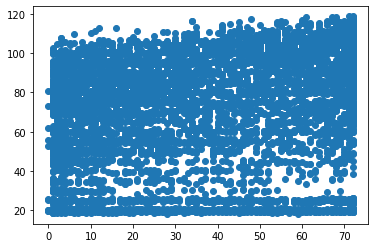

In [19]:
plt.scatter(x, y)

- $H_0$: the longer a customer has been subscibed to our company the less they pay overall.
- $H_a$: the longer a customer has been subscibed to our company the more they pay overall.

In [20]:
#total charges
query2 = "SELECT tenure, total_charges FROM customers;"

total_telco_churn = pd.read_sql(query2, url)

total_charges = total_telco_churn.total_charges

total_charges = total_charges.replace(r'^\s+$', np.nan, regex=True)

x1 = total_telco_churn.tenure
y1 = total_charges.fillna(0).astype(float)

r, p = stats.pearsonr(x1, y1)
print(f"our r-statistic {r}, shows a strong correlation between longevity as a subscriber and amount paid overall ",
      f"our p-value {p} rejects the null hypothesis")

our r-statistic 0.826178397950242, shows a strong correlation between longevity as a subscriber and amount paid overall  our p-value 0.0 rejects the null hypothesis


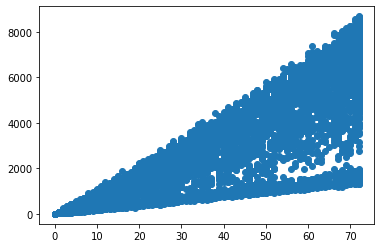

In [21]:
plt.scatter(x1, y1)

- $H_0$: is a customer has phone and internet they less the longer they're subscribed
- $H_a$: if a customer has phone and internet they pay more the longer they're subscribed

In [22]:
# control for phone and internet

query3 = "SELECT tenure, total_charges FROM customers WHERE internet_service_type_id < 3 AND phone_service = 'Yes';"

control = pd.read_sql(query3, url)

cleaning_charges = control.total_charges.replace(r'^\s+$', np.nan, regex=True)
cleaning_charges = cleaning_charges.fillna(0).astype(float)

x2 = control.tenure
y2 = cleaning_charges

In [23]:
r, p = stats.pearsonr(x2, y2)

r, p

(0.9579592038044629, 0.0)

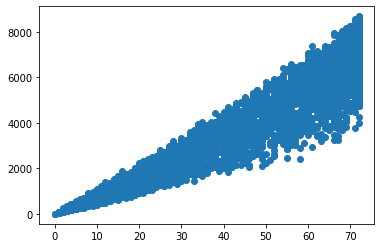

In [24]:
plt.scatter(x2, y2)

- $H_0$: is a customer has phone only they less the longer they're subscribed
- $H_a$: if a customer has phone only they pay more the longer they're subscribed

In [25]:
# control for phone only
phone_query = "SELECT tenure, total_charges FROM customers WHERE internet_service_type_id = 3 AND phone_service = 'Yes';"

phone_only = pd.read_sql(phone_query, url)
cleaning_charges = phone_only.total_charges.replace(r'^\s+$', np.nan, regex=True)
cleaning_charges = cleaning_charges.fillna(0).astype(float)

phone_only_x = phone_only.tenure
phone_only_y = cleaning_charges
r, p = stats.pearsonr(phone_only_x, phone_only_y)

print(f"r-statistics={r} strong correlation between phone service and paying more the longer you're using our services, p-value={p} we reject our null hypothesis")

r-statistics=0.9815669784401058 strong correlation between phone service and paying more the longer you're using our services, p-value=0.0 we reject our null hypothesis


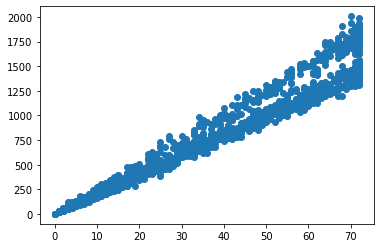

In [26]:
plt.scatter(phone_only_x, phone_only_y)

- $H_0$: is a customer has internet only they less the longer they're subscribed
- $H_a$: if a customer has internet only they pay more the longer they're subscribed

In [27]:
# control for internet only
internet_only_query = "SELECT tenure, total_charges FROM customers WHERE internet_service_type_id < 3 AND phone_service = 'No';"

internet_only = pd.read_sql(internet_only_query, url)

cleaning_charges = internet_only.total_charges.replace(r'^\s+$', np.nan, regex=True)
cleaning_charges = cleaning_charges.fillna(0).astype(float)

internet_only_x = internet_only.tenure
internet_only_y = cleaning_charges

r, p = stats.pearsonr(internet_only_x, internet_only_y)

print(f"r-statistic={r} shows a strong correlation between having only internet service and increased price per month, p-value{p} rejects the null hypothesis")

r-statistic=0.9535697728407464 shows a strong correlation between having only internet service and increased price per month, p-value0.0 rejects the null hypothesis


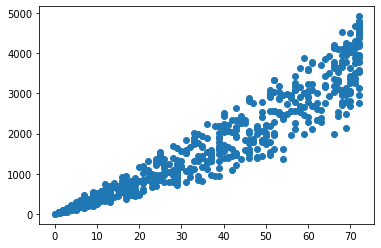

In [28]:
plt.scatter(internet_only_x, internet_only_y)

### 2.) Use the employees database.

In [29]:
employees_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

- Is there a relationship between how long an employee has been with the company and their salary?

- $H_0$: the longer an employee is employeed the lower they get paid
- $H_a$: the longer an employee works for this company the more they get paid

In [30]:
query4 = """
SELECT e.hire_date, s.salary 
FROM employees AS e 
JOIN salaries AS s USING(emp_no) 
WHERE s.to_date > now();"""

tenure_salary = pd.read_sql(query4, employees_url)

In [31]:
tenure_salary.head()

,hire_date,salary
0,1986-06-26,88958
1,1985-11-21,72527
2,1986-08-28,43311
3,1986-12-01,74057
4,1989-09-12,94692


In [32]:
import datetime

tenure_salary = tenure_salary.sort_values('hire_date', ascending=True)

tenure_salary['year'] = pd.DatetimeIndex(tenure_salary['hire_date']).year

tenure_salary.head()

,hire_date,salary,year
80212,1985-01-01,95873,1985
80200,1985-01-01,79229,1985
80202,1985-01-01,72583,1985
80206,1985-01-01,72903,1985
80208,1985-01-01,93193,1985


In [33]:
x = tenure_salary.year
y = tenure_salary.salary

r, p = stats.pearsonr(y, x)

print(f"r-statstic = {r} shows a moderate correlation between length employeed and salary, p-value = {p} rejects our null hypothesis")

r-statstic = -0.3051601122415336 shows a moderate correlation between length employeed and salary, p-value = 0.0 rejects our null hypothesis


(40000, 83025.50622428511)

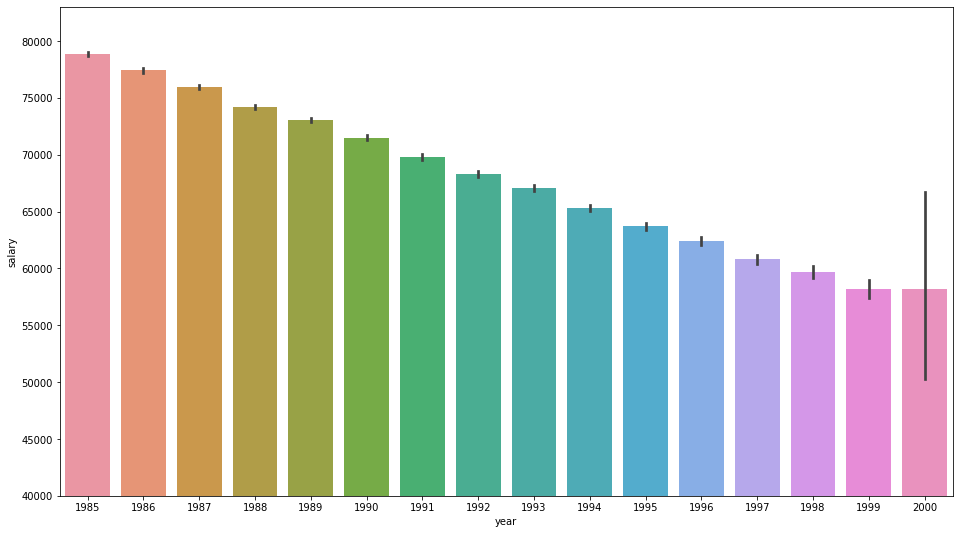

In [34]:
fig = plt.figure(figsize=(16,9))
sns.barplot(x, y)
plt.ylim(bottom=40000)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- $H_0$: There is no relationship between how long an employee has been with the company and how many titles they have
- $H_a$: There is a relationship between how long an employee has been with the company and how many titles they have

In [35]:
query5 = "SELECT e.emp_no, e.hire_date, count(t.title) FROM employees AS e JOIN titles AS t USING(emp_no) GROUP BY emp_no;"
employee_tenure = pd.read_sql(query5, employees_url)

In [36]:
employee_tenure.head()

,emp_no,hire_date,count(t.title)
0,10001,1986-06-26,1
1,10002,1985-11-21,1
2,10003,1986-08-28,1
3,10004,1986-12-01,2
4,10005,1989-09-12,2


In [37]:
employee_tenure = employee_tenure.sort_values('hire_date', ascending=True)

employee_tenure['year'] = pd.DatetimeIndex(employee_tenure['hire_date']).year

employee_tenure.head()

,emp_no,hire_date,count(t.title),year
100010,110511,1985-01-01,2,1985
100016,111035,1985-01-01,2,1985
100018,111400,1985-01-01,2,1985
100020,111692,1985-01-01,2,1985
100006,110303,1985-01-01,2,1985


In [38]:
x = employee_tenure.year
y = employee_tenure["count(t.title)"]

r, p = stats.pearsonr(x, y)

r, p

(-0.2657942358524072, 0.0)

(1, 1.6852766097519536)

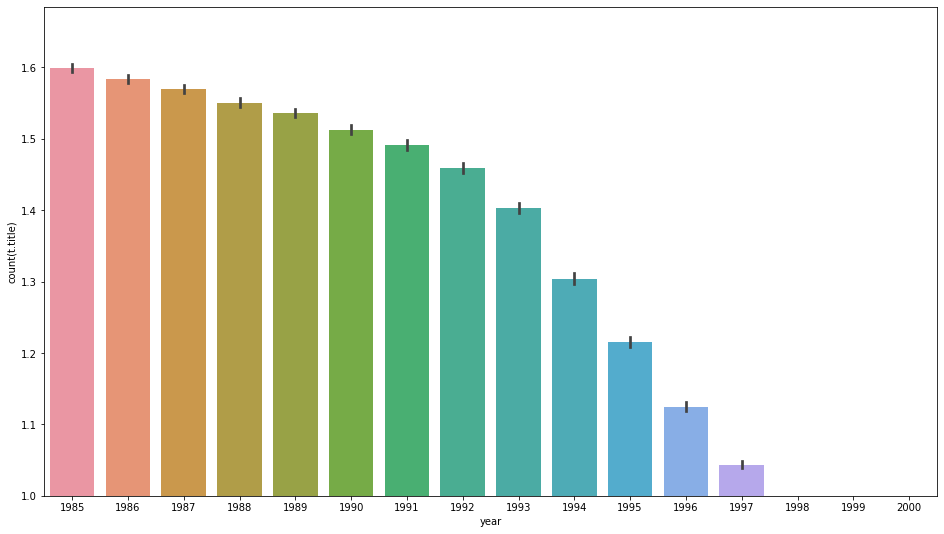

In [39]:
fig = plt.figure(figsize=(16,9))
sns.barplot(x, y)
plt.ylim(bottom=1)

### 3.) Use the sleepstudy data. Is there a relationship between days and reaction time?

- $H_0$: There is no correlation between how long people go without sleep and reaction time
- $H_a$: There is a correlation between how long people go without sleep and their reaction time

In [40]:
sleepstudy = data('sleepstudy')

sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
Reaction    180 non-null float64
Days        180 non-null int64
Subject     180 non-null int64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [41]:
x = sleepstudy.Days
y = sleepstudy.Reaction

r, p = stats.pearsonr(x, y)
r, p

print(f"r-statistic = {r} shows a moderate correlation between days without sleep and reaction time, our p-value = {p} rejects the null hypothesis")

r-statistic = 0.5352302262650253 shows a moderate correlation between days without sleep and reaction time, our p-value = 9.894096322214812e-15 rejects the null hypothesis


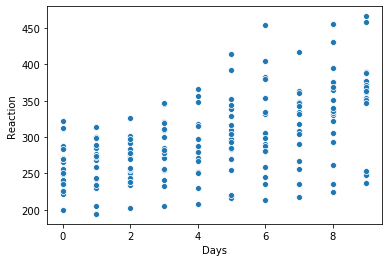

In [42]:
sns.scatterplot(x, y)

# Chi^2 exercises

### 1.) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

- $H_0$: being at codeup and using a macbook are independent of each other.

In [43]:
import pandas as pd
data = {'Codeup Student':[49, 1], 'Not Codeup Student':[20, 30]}
df = pd.DataFrame(data, index =['Uses a Macbook', "Doesn't use a Macbook"])

df



,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't use a Macbook,1,30


In [44]:
from scipy import stats
observed = df
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(36.65264142122487, 1.4116760526193828e-09, 1, array([[34.5, 34.5],
        [15.5, 15.5]]))

In [45]:
print(f"p = {p:.10f} rejecting our null hypothesis")

p = 0.0000000014 rejecting our null hypothesis


### 2.) Choose another 2 categorical variables from the mpg dataset and perform a CHI2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [46]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- $H_0$: manufacturer and transmissions are independant of one another
- $H_a$: manufacturer and transmission are dependant of one another

In [47]:
mpg['transmission'] = mpg.trans.str[:-4]

observations = pd.crosstab(mpg.manufacturer, mpg.transmission)

observations

transmission,auto,manual
manufacturer,,
audi,11,7
chevrolet,16,3
dodge,30,7
ford,17,8
honda,4,5
hyundai,7,7
jeep,8,0
land rover,4,0
lincoln,3,0


In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observations)

chi2, p, degf, expected

(29.293684393117655,
 0.00953444310358795,
 14,
 array([[12.07692308,  5.92307692],
        [12.74786325,  6.25213675],
        [24.82478632, 12.17521368],
        [16.77350427,  8.22649573],
        [ 6.03846154,  2.96153846],
        [ 9.39316239,  4.60683761],
        [ 5.36752137,  2.63247863],
        [ 2.68376068,  1.31623932],
        [ 2.01282051,  0.98717949],
        [ 2.68376068,  1.31623932],
        [ 8.72222222,  4.27777778],
        [ 3.35470085,  1.64529915],
        [ 9.39316239,  4.60683761],
        [22.81196581, 11.18803419],
        [18.11538462,  8.88461538]]))

In [49]:
print(f"P = {p:.4f}, rejects the null hypothesis; manufacturer and transmission are dependant of each other")

P = 0.0095, rejects the null hypothesis; manufacturer and transmission are dependant of each other


### 3.) Use the data from the employees database to answer these questions:

In [50]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'    

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- $H_0$: an employees gender and wether they work in sales or marketing are independant events
- $H_a$: an employees gender and wether they work in sales or marketing are dependant events

In [51]:
query = """
SELECT emp_no, gender, dept_name 
FROM employees 
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE to_date > now();
"""

df = pd.read_sql(query, url)

In [52]:
df.set_index("emp_no", inplace=True)

In [53]:
observations = pd.crosstab(df.dept_name, df.gender)

In [54]:
observations = observations.drop(['Customer Service', 'Development', 'Finance', 'Human Resources', 'Production', 'Quality Management'])


In [55]:
observations = observations.drop(['Research'])

In [56]:
observations

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observations)

chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013,  8948.7573987],
        [14969.7573987, 22731.2426013]]))

In [58]:
print(f'P = {p}, we fail to reject the null hypothesis')

P = 0.5691938610810126, we fail to reject the null hypothesis


- Is an employee's gender independent of whether or not they are or have been a manager?

- $H_0$: An employees gender and being a manager are independant events
- $H_a$: An employees gender and their position in managment are dependant events

In [69]:
query = """
SELECT gender, dept_name 
FROM employees
LEFT JOIN dept_manager USING(emp_no)
JOIN departments USING(dept_no); 
"""

df = pd.read_sql(query, url)

df

,gender,dept_name
0,F,Customer Service
1,F,Customer Service
2,F,Customer Service
3,M,Customer Service
4,M,Development
5,F,Development
6,M,Finance
7,F,Finance
8,F,Human Resources
9,F,Human Resources


In [70]:
observations2 = pd.crosstab(df.dept_name, df.gender)

observations2

gender,F,M
dept_name,,
Customer Service,3,1
Development,1,1
Finance,1,1
Human Resources,2,0
Marketing,0,2
Production,2,2
Quality Management,3,1
Research,1,1
Sales,0,2


In [71]:
chi2, p, degf, expected = stats.chi2_contingency(observations2)

chi2, p, degf, expected

(7.888111888111888, 0.44447543304224046, 8, array([[2.16666667, 1.83333333],
        [1.08333333, 0.91666667],
        [1.08333333, 0.91666667],
        [1.08333333, 0.91666667],
        [1.08333333, 0.91666667],
        [2.16666667, 1.83333333],
        [2.16666667, 1.83333333],
        [1.08333333, 0.91666667],
        [1.08333333, 0.91666667]]))

In [62]:
print(f'P = {p}, We fail to reject the null hypothesis, gender and position in managment are independant events')

P = 0.44447543304224046, We fail to reject the null hypothesis, gender and position in managment are independant events


another way

In [66]:
new_query = """
SELECT title, gender 
FROM titles 
JOIN employees USING(emp_no)
WHERE title = "Staff";
"""

df2 = pd.read_sql(new_query, url)